In [40]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
nltk.download('popular')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

# Partie 1 

In [33]:
# Text 
abloh = "At Louis Vuitton, he brought in a younger demographic, with menswear collections that blurred the lines between high fashion and streetwear, as well as pushed artistic boundaries and challenged gender norms. A sparkly embroidered bib he designed, for example, became an instant talking point when it was worn by Timothee Chalamet to the Golden Globes in 2019. Other versions were donned by Michael B. Jordan and Chadwick Boseman. Famous for cross-collaborations, one of Abloh's greatest legacies was his contribution to the world of footwear -- setting the standard for innovative sneakers, in edition after edition of Off-White x Nike designs. He was also big in the world of music, and as a prolific DJ, played at music venues around the world. As a longstanding collaborator of Kanye West, now known as Ye, he worked as a creative director for the rapper's design agency Donda, and designed some of Ye's album covers. As an artist and furniture designer, he collaborated with the likes of Mercedes Benz on an art concept car and IKEA on a coveted range aimed at people moving into their first homes. Tributes poured in overnight for the late designer, who was one of fashion's most powerful Black men, in an industry that notoriously lacks diversity. Harlem couturier Daniel Day, known as Dapper Dan, spoke to the point in an Instagram post, writing Virgil's life was a testament to how much Black Lives Matter by showing what black lives are capable of."

In [34]:
# transforme le text en token de phrases
sent_tokens = sent_tokenize(abloh)
sent_tokens

['At Louis Vuitton, he brought in a younger demographic, with menswear collections that blurred the lines between high fashion and streetwear, as well as pushed artistic boundaries and challenged gender norms.',
 'A sparkly embroidered bib he designed, for example, became an instant talking point when it was worn by Timothee Chalamet to the Golden Globes in 2019.',
 'Other versions were donned by Michael B. Jordan and Chadwick Boseman.',
 "Famous for cross-collaborations, one of Abloh's greatest legacies was his contribution to the world of footwear -- setting the standard for innovative sneakers, in edition after edition of Off-White x Nike designs.",
 'He was also big in the world of music, and as a prolific DJ, played at music venues around the world.',
 "As a longstanding collaborator of Kanye West, now known as Ye, he worked as a creative director for the rapper's design agency Donda, and designed some of Ye's album covers.",
 'As an artist and furniture designer, he collaborated 

In [35]:
# Transforme ton texte en tokens de mots
word_tokens = word_tokenize(abloh.lower())


In [36]:
#Compte la fréquence d'apparition de chaque mot 
freq = FreqDist(word_tokens)

In [37]:
# 20 mots les plus présents
most_com = freq.most_common(20)


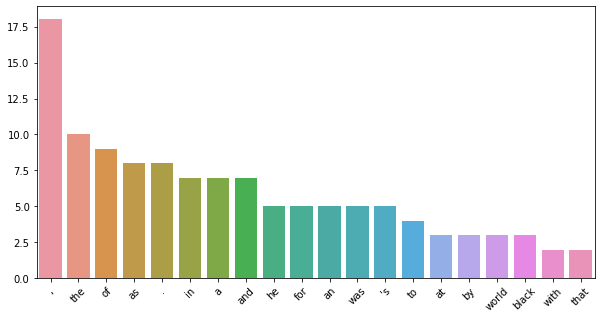

In [38]:
# plot des 20 mots les plus présents
# Conversion en Series
most_com_series = pd.Series(dict(most_com))

# plot
plt.figure(figsize=(10,5))
sns.barplot(x = most_com_series.index, y=most_com_series.values)
plt.xticks(rotation = 45)
plt.show()

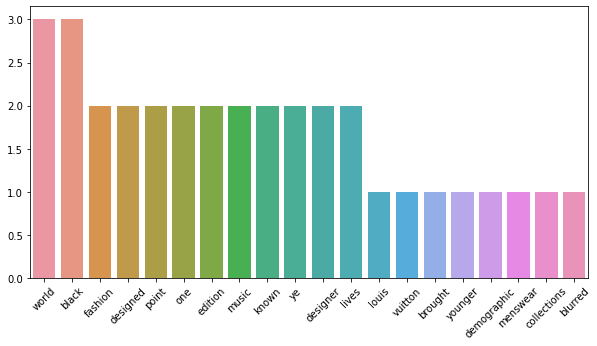

In [39]:
# drop les stopwords et ponctuations
clean_tokens = [w for w in word_tokens if w.isalnum() and not w in stopwords.words("english")]

#Compte la fréquence d'apparition de chaque mot 
freq2 = FreqDist(clean_tokens)

# 20 mots les plus vus
most_com2 = freq2.most_common(20)

# trasnfo en Series
most_com_series2 = pd.Series(dict(most_com2))

# plot
plt.figure(figsize=(10,5))
sns.barplot(x = most_com_series2.index, y=most_com_series2.values)
plt.xticks(rotation = 45)
plt.show()

Without the punctuation or the stopwords, the most commons word are totally differents.

# Partie 2 : Stemming & Lemmatizing

In [32]:
# texte nettoyé sans ponctuation ni stopwords : clean_tokens

# Stemming 
stem_en = SnowballStemmer('english')
stem_tokens = [stem_en.stem(word) for word in clean_tokens]

# frequence
stem_freq = FreqDist(stem_tokens)
stem_freq.most_common(20)


[('design', 6),
 ('world', 3),
 ('black', 3),
 ('fashion', 2),
 ('artist', 2),
 ('point', 2),
 ('one', 2),
 ('edit', 2),
 ('music', 2),
 ('collabor', 2),
 ('known', 2),
 ('ye', 2),
 ('live', 2),
 ('loui', 1),
 ('vuitton', 1),
 ('brought', 1),
 ('younger', 1),
 ('demograph', 1),
 ('menswear', 1),
 ('collect', 1)]

Certains mots sont tronqués car il consifère que c'est du pluriel alors que ce sont des noms propres. (ex: Louis ==> Loui) 

In [31]:
# Lemmatizing
nlp = spacy.load('en_core_web_sm')

# transfo de clean_tokens pour que lemma fonctionne
clean_str = ' '.join(clean_tokens)

lemma_tokens = nlp(clean_str)

# liste avec les mots lemmatisés
lemma_tok_list= [word.lemma_ for word in lemma_tokens]

# frequence
lemma_freq = FreqDist(lemma_tok_list)
lemma_freq.most_common(20)

[('design', 4),
 ('world', 3),
 ('black', 3),
 ('life', 3),
 ('fashion', 2),
 ('point', 2),
 ('one', 2),
 ('edition', 2),
 ('music', 2),
 ('know', 2),
 ('ye', 2),
 ('designer', 2),
 ('louis', 1),
 ('vuitton', 1),
 ('bring', 1),
 ('young', 1),
 ('demographic', 1),
 ('menswear', 1),
 ('collection', 1),
 ('blur', 1)]

In [47]:
stem_most_comm = pd.Series(dict(stem_freq.most_common(20)))
lemma_most_comm = pd.Series(dict(lemma_freq.most_common(20)))

fig = px.bar(stem_most_comm, x =stem_most_comm.index, y =stem_most_comm.values, title = 'Most common words in Article with Stemming Method', 
             color=stem_most_comm.values, labels= {'x': 'Words', 'y': 'Frequency'})
fig.update_layout(height=450, width=1100)
fig.show()

fig = px.bar(lemma_most_comm, x =lemma_most_comm.index, y =lemma_most_comm.values, title = 'Most common words in Article with Lemmatizing Method', 
             color=stem_most_comm.values, labels= {'x': 'Words', 'y': 'Frequency'})
fig.update_layout(height=450, width=1100)
fig.show()

Le mot 'artiste' a disparu, ce qui ici n'est pas forcément intéressant. Cependant le reste des mots est plus pertinant.

En comparant les deux, les mots sont sensiblement les même mais avec une écriture différente. 
Dans le cas présent, l'article parle de la mort de Vigil Abloh (designer de mode et DJ), je trouve les résultat du stemming plus intéressant car les mots principaux qui ressortent sont design, world, black, fashion et artist.

Dans le lemmatizing artist est remplacé par life, et n'apparait même plus. 